In [1]:
import gge

In [2]:
import ee
ee.Authenticate()


Successfully saved authorization token.


In [3]:
from gge import sensors

In [5]:
area = (12.1, 55.60, 12.14, 55.62)  # Define the area, can also give .shp or .geojson file...
area = "/Users/kaaso/Documents/phd/coding/gge/data/location/eigil/melange_roi.shp"
time_range = ('2024-05-01', '2024-06-10') 

In [9]:

landsat = sensors.Landsat()
landsat.allow_upload = True

In [10]:

landsat.area = area
landsat.time_range = time_range



In [11]:
landsat.download_data()

No images found in collection LANDSAT/LM01/C02/T1 for the given filters.
No images found in collection LANDSAT/LM02/C02/T1 for the given filters.
No images found in collection LANDSAT/LM03/C02/T1 for the given filters.
No images found in collection LANDSAT/LT04/C02/T1_L2 for the given filters.
No images found in collection LANDSAT/LT05/C02/T1_L2 for the given filters.
No images found in collection LANDSAT/LE07/C02/T1_L2 for the given filters.


2024-07-17 14:21:26,314 - root - ERROR - Error converting image LC08_230012_20240507: Image.sampleRectangle: Too many pixels in sample; must be <= 262144. Got 1991421. (landsat.py:60)
2024-07-17 14:21:26,315 - root - INFO - Trying to upload to google drive (landsat.py:63)
Task WVNDK5BFG4IHL3S2Z3QR7HSB is running: |           | 01:46 elapsed


KeyboardInterrupt: 

In [8]:
len(landsat.images_data)

4

In [14]:
list(landsat.images_data[0]["metadata"].keys())

['DATA_SOURCE_ELEVATION',
 'WRS_TYPE',
 'REFLECTANCE_ADD_BAND_1',
 'REFLECTANCE_ADD_BAND_2',
 'DATUM',
 'REFLECTANCE_ADD_BAND_3',
 'REFLECTANCE_ADD_BAND_4',
 'REFLECTANCE_ADD_BAND_5',
 'REFLECTANCE_ADD_BAND_6',
 'REFLECTANCE_ADD_BAND_7',
 'system:footprint',
 'REFLECTIVE_SAMPLES',
 'GROUND_CONTROL_POINTS_VERSION',
 'SUN_AZIMUTH',
 'DATA_SOURCE_TIRS_STRAY_LIGHT_CORRECTION',
 'UTM_ZONE',
 'DATE_ACQUIRED',
 'ELLIPSOID',
 'system:time_end',
 'DATA_SOURCE_PRESSURE',
 'LANDSAT_PRODUCT_ID',
 'STATION_ID',
 'TEMPERATURE_ADD_BAND_ST_B10',
 'DATA_SOURCE_REANALYSIS',
 'REFLECTANCE_MULT_BAND_7',
 'system:time_start',
 'REFLECTANCE_MULT_BAND_6',
 'L1_PROCESSING_LEVEL',
 'PROCESSING_SOFTWARE_VERSION',
 'L1_DATE_PRODUCT_GENERATED',
 'ORIENTATION',
 'REFLECTANCE_MULT_BAND_1',
 'WRS_ROW',
 'REFLECTANCE_MULT_BAND_3',
 'REFLECTANCE_MULT_BAND_2',
 'TARGET_WRS_ROW',
 'REFLECTANCE_MULT_BAND_5',
 'REFLECTANCE_MULT_BAND_4',
 'THERMAL_LINES',
 'TIRS_SSM_POSITION_STATUS',
 'GRID_CELL_SIZE_THERMAL',
 'IMAGE_QUAL

In [9]:
for key in landsat.images_data[0]["image_bands"].keys():
    print(landsat.images_data[0]["image_bands"][key].max())

9269
9773
10367
10463
23484
16957
12890
100
43813
8407
3270
589
9904
251
211
8788
1133
21952
0


In [15]:
landsat.dn_to_reflectance()

In [ ]:
landsat.images_data[0]["image_bands"].keys()

In [16]:
for key in landsat.images_data[0]["image_bands"].keys():
    print(landsat.images_data[0]["image_bands"][key].max())

0.05489749999999999
0.06873000000000001
0.08509250000000002
0.08773249999999999
0.44581
16957
0.15447500000000003
100
43813
8407
3270
589
9904
251
211
8788
1133
21952
0


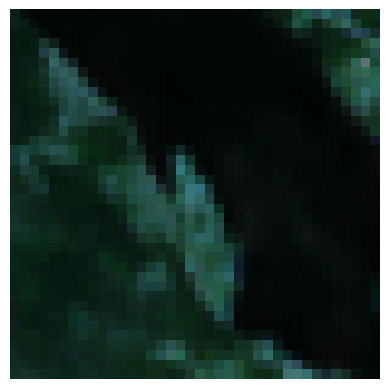

In [34]:
landsat.display_rgb(0, gamma =1.2, gain = 0.5)

In [54]:
landsat.item_type = "RGB" # normalized difference water index

In [55]:
img, meta = landsat[0]

In [56]:
img.shape

(38, 38, 3)

'/Users/kaaso/Documents/phd/coding/gge/data/location/bunaeset/POLYGON.shp'

In [57]:
meta

{'DATA_SOURCE_ELEVATION': 'GLS2000',
 'WRS_TYPE': 2,
 'REFLECTANCE_ADD_BAND_1': -0.2,
 'REFLECTANCE_ADD_BAND_2': -0.2,
 'DATUM': 'WGS84',
 'REFLECTANCE_ADD_BAND_3': -0.2,
 'REFLECTANCE_ADD_BAND_4': -0.2,
 'REFLECTANCE_ADD_BAND_5': -0.2,
 'REFLECTANCE_ADD_BAND_6': -0.2,
 'REFLECTANCE_ADD_BAND_7': -0.2,
 'system:footprint': {'type': 'LinearRing',
  'coordinates': [[10.085875304184764, 61.18478903317145],
   [10.083166178171103, 61.1848107710115],
   [9.860338830318018, 60.83928967736951],
   [9.098766542085736, 59.59536516520829],
   [9.068902976180055, 59.54365868247191],
   [9.05015960313442, 59.510166482059276],
   [9.069404534334728, 59.50719260070751],
   [11.906619643355876, 59.035521609340705],
   [12.174259534882868, 58.98712757509583],
   [12.178492137435793, 58.9931866327434],
   [12.264619207237747, 59.11911454350514],
   [12.322154338658732, 59.202801283941085],
   [12.58573865830846, 59.580917647650466],
   [12.614201497174047, 59.621294245812486],
   [12.866089501047378, 59

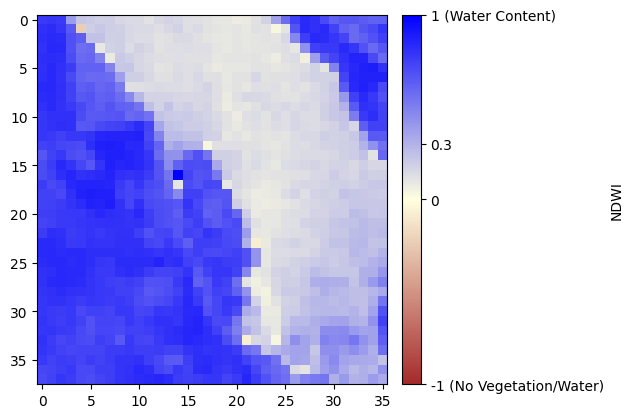

In [47]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

img, meta = landsat[2]

# Define a custom normalization class to emphasize differences
class MidpointNormalize(mcolors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=0, clip=False):
        self.midpoint = midpoint
        mcolors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))

# Create a custom color map
cmap = mcolors.LinearSegmentedColormap.from_list(
    "ndwi", ["brown", "lightyellow", "blue"], N=256)

# Create a normalized color bar for the NDWI range
norm = MidpointNormalize(vmin=-1, vmax=1, midpoint=0)

# Plot the image
fig, ax = plt.subplots()
cax = ax.imshow(img, cmap=cmap, norm=norm)


# Create a color bar
cbar = fig.colorbar(cax, ax=ax, orientation='vertical', fraction=0.046, pad=0.03)
cbar.set_label('NDWI')

# Add labels to the color bar
cbar.set_ticks([-1, 0, 0.3, 1])
cbar.set_ticklabels(['-1 (No Vegetation/Water)', '0', '0.3', '1 (Water Content)'])

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

img1, meta = landsat[50]
img2, meta = landsat[51]
img = img1 - img2

# Define a custom normalization class to emphasize differences
class MidpointNormalize(mcolors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=0, clip=False):
        self.midpoint = midpoint
        mcolors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))

# Create a custom color map
cmap = mcolors.LinearSegmentedColormap.from_list(
    "ndwi", ["brown", "lightyellow", "blue"], N=256)

# Create a normalized color bar for the NDWI range
norm = MidpointNormalize(vmin=-1, vmax=1, midpoint=0)

# Plot the image
fig, ax = plt.subplots()
cax = ax.imshow(img, cmap=cmap, norm=norm)


# Create a color bar
cbar = fig.colorbar(cax, ax=ax, orientation='vertical', fraction=0.046, pad=0.03)
cbar.set_label('NDWI')

# Add labels to the color bar
cbar.set_ticks([-1, 0, 0.3, 1])
cbar.set_ticklabels(['-1 (No Vegetation/Water)', '0', '0.3', '1 (Water Content)'])

plt.show()


In [ ]:
# we could also use a single band, or another indices
landsat.item_type = "SR_B4"

ndwi for begge billeder

In [ ]:
NWDIs = {}
for i in range(len(landsat)):
    img, meta = landsat[i]
    if i not in NWDIs:  # Check if the key does not exist
        NWDIs[i] = {}  # Initialize it as an empty dictionary
    NWDIs[i]["NDWI"] = img
    NWDIs[i]["time"] = meta["L1_DATE_PRODUCT_GENERATED"]
    NWDIs[i]["metadata"] = meta

In [ ]:
len(NWDIs)

In [ ]:
NWDIs[0]["NDWI"]

In [ ]:

# Assuming NWDIs is a list of dictionaries and each dictionary has an "NDWI" key with an array
arrays = [NWDIs[i]["NDWI"] for i in range(33, 65) if NWDIs[i]["NDWI"].shape == NWDIs[0]["NDWI"].shape]

# Stack arrays along a new axis to create a single array of shape (60, N, M)
combined_array = np.stack(arrays, axis=0)

# combined_array now has shape (60, N, M)

In [ ]:
np.save("../data/ndwi_stack_test.npy", combined_array)